# customer life time value prediction

In [183]:
# import necessary library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta

## Data Preprocessing and CLV Calculations

In [51]:
#load the data and perform basic 
df = pd.read_csv(r"C:\Users\HP\Documents\insta\customer_segmentation.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [53]:
#shape of the data 
print("shape of data :",df.shape)

shape of data : (541909, 8)


In [55]:
#description of data 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [57]:
#information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [65]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [101]:
#convert Invoicedate into transaction_date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [105]:
df['InvoiceDate']

61624    2011-01-18 10:17:00
61619    2011-01-18 10:01:00
535004   2011-12-07 15:52:00
535005   2011-12-07 15:52:00
535006   2011-12-07 15:52:00
                 ...        
1967     2010-12-01 14:32:00
1968     2010-12-01 14:32:00
1969     2010-12-01 14:32:00
1970     2010-12-01 14:32:00
622      2010-12-01 11:52:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [143]:
# Calculate recency, frequency, and monetary value (RFM)
# Recency: days since the last purchase
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days)
recency

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: InvoiceDate, Length: 4372, dtype: int64

In [109]:
# Frequency: total transactions by customer
customer_frequency = df.groupby('CustomerID').size()
customer_frequency

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Length: 4372, dtype: int64

In [122]:
# Monetary: total amount spent by customer
df['transaction_amount']=df['Quantity']*df['UnitPrice']
customer_monetary = df.groupby('CustomerID')['transaction_amount'].sum()
customer_monetary

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: transaction_amount, Length: 4372, dtype: float64

In [145]:
# Combine RFM into a single DataFrame[ where ]
new_df = pd.DataFrame({'recency': recency, 'frequency': customer_frequency, 'monetary': customer_monetary})
new_df.reset_index(inplace=True)

In [147]:
new_df

,CustomerID,recency,frequency,monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
...,...,...,...,...
4367,18280.0,277,10,180.60
4368,18281.0,180,7,80.82
4369,18282.0,7,13,176.60
4370,18283.0,3,756,2094.88


In [218]:
# Calculate historical CLV
new_df['historical_clv'] = new_df['monetary'] / new_df['frequency'] * new_df['frequency']

print(new_df[['CustomerID', 'historical_clv']].head())

   CustomerID  historical_clv
0     12346.0            0.00
1     12347.0         4310.00
2     12348.0         1797.24
3     12349.0         1757.55
4     12350.0          334.40


C:\Users\HP\AppData\Local\Temp\ipykernel_13720\3472717920.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='historical_clv', data=new_df_sorted.head(top_n), palette='viridis')


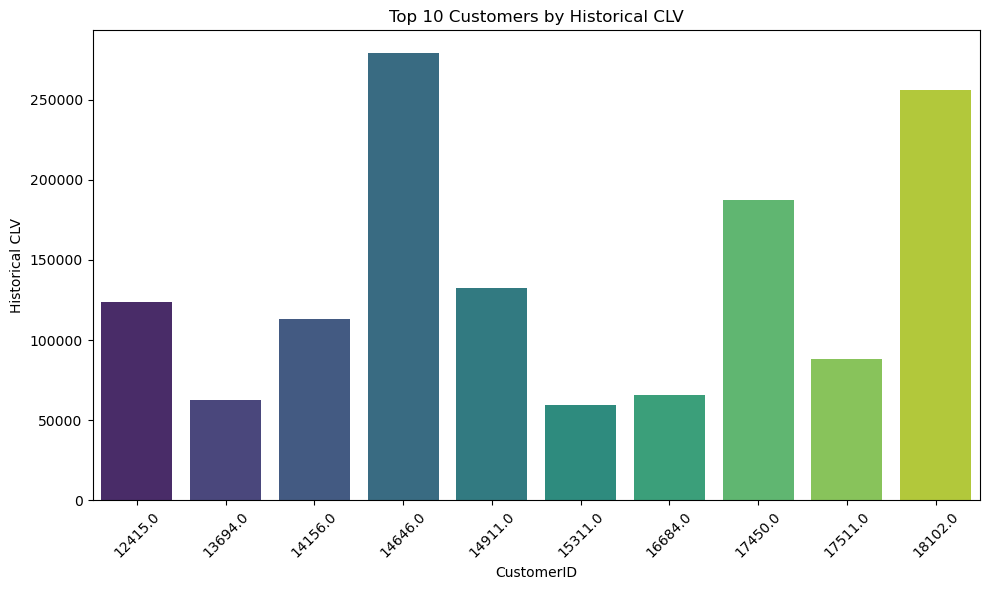

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the data is sorted by CustomerID or CLV for easier visualization
new_df_sorted = new_df[['CustomerID', 'historical_clv']].sort_values(by='historical_clv', ascending=False)

# Bar plot to show the top N customers with highest historical CLV
top_n = 10  # You can change this to display more/less customers
plt.figure(figsize=(10, 6))
sns.barplot(x='CustomerID', y='historical_clv', data=new_df_sorted.head(top_n), palette='viridis')
plt.title('Top 10 Customers by Historical CLV')
plt.xlabel('CustomerID')
plt.ylabel('Historical CLV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


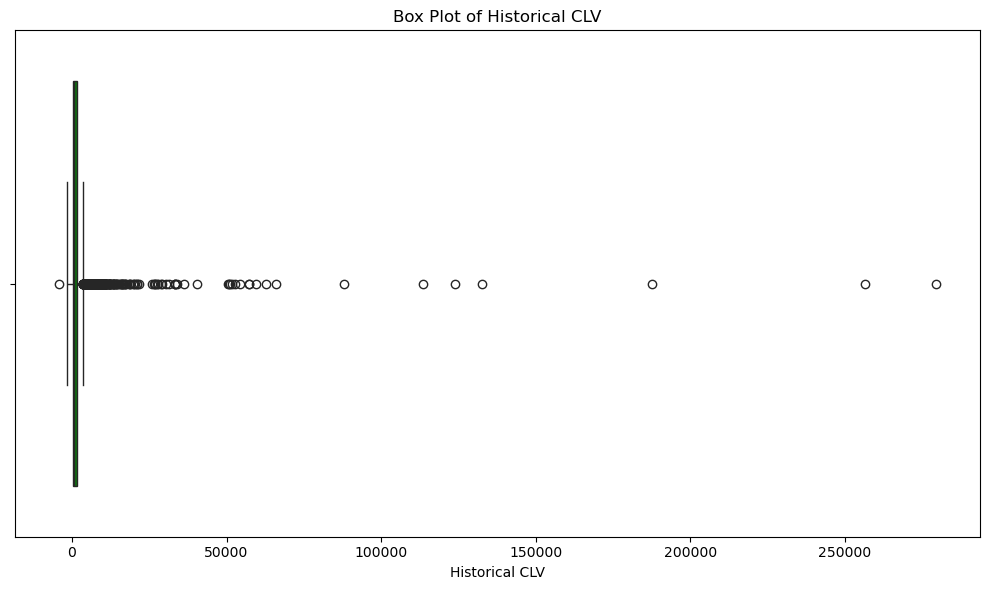

In [243]:
# Box plot to check the spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_df['historical_clv'], color='green')
plt.title('Box Plot of Historical CLV')
plt.xlabel('Historical CLV')
plt.tight_layout()
plt.show()

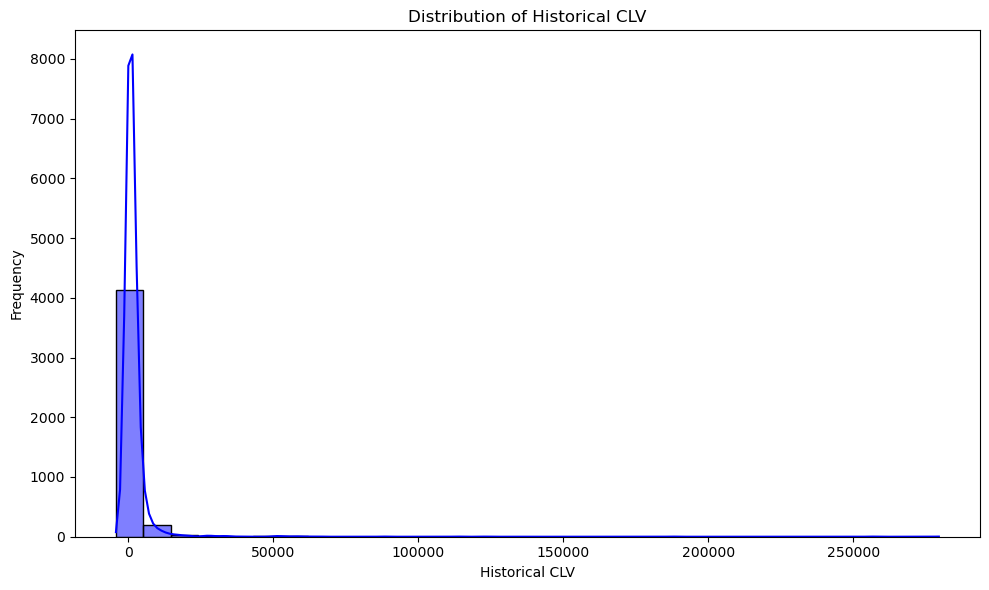

In [245]:
# Histogram to show the distribution of Historical CLV
plt.figure(figsize=(10, 6))
sns.histplot(new_df['historical_clv'], kde=True, color='blue', bins=30)
plt.title('Distribution of Historical CLV')
plt.xlabel('Historical CLV')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Predictive Modelling for CLV

In [165]:
# Define features and target for predictive modeling
X = new_df[['recency', 'frequency', 'monetary']]
y = new_df['historical_clv']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [185]:
#linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [187]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Display model performance
print("Linear Model Score:", linear_model.score(X_test, y_test))
print("Random Forest Model Score:", rf_model.score(X_test, y_test))

Linear Model Score: 1.0
Random Forest Model Score: 0.9853980827328002


In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate R-squared (already obtained by .score method)
print("Linear Model R-squared:", r2_score(y_test, y_pred_linear))
print("Random Forest Model R-squared:", r2_score(y_test, y_pred_rf))

Linear Model R-squared: 1.0
Random Forest Model R-squared: 0.9853980827328002


In [191]:

# Calculate Mean Absolute Error (MAE)
print("Linear Model MAE:", mean_absolute_error(y_test, y_pred_linear))
print("Random Forest Model MAE:", mean_absolute_error(y_test, y_pred_rf))

Linear Model MAE: 2.434666701384832e-12
Random Forest Model MAE: 51.03646086890224


In [193]:
# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
print("Linear Model MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))


Linear Model MSE: 7.4704761090614e-23
Linear Model RMSE: 8.643191603257097e-12


In [195]:

print("Random Forest Model MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest Model RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Model MSE: 791055.2198187722
Random Forest Model RMSE: 889.4128511657408


In [203]:
# Define CLV Segments
new_df['CLV_segment'] = pd.qcut(new_df['historical_clv'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Strategy suggestions
for segment in new_df['CLV_segment'].unique():
    print(f"Strategy for {segment} CLV Segment:")
    if segment == 'Low':
        print("Consider offering discounts to encourage additional purchases\n")
    elif segment == 'Medium':
        print("Increase engagement with loyalty programs\n")
    elif segment == 'High':
        print("Upsell and cross-sell additional products\n")
    elif segment == 'Very High':
        print("Provide VIP offers or exclusive experiences to retain top customers\n")

Strategy for Low CLV Segment:
Consider offering discounts to encourage additional purchases

Strategy for Very High CLV Segment:
Provide VIP offers or exclusive experiences to retain top customers

Strategy for Medium CLV Segment:
Increase engagement with loyalty programs

Strategy for High CLV Segment:
Upsell and cross-sell additional products

